####  **Import Required Libraries**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import joblib

#### **Load the Model**

In [7]:
final_model = joblib.load("../resources/models/logistic_regression_pipeline.pkl")

In [8]:
def interpret_logistic_model(coef_df, title="Feature Impact on Churn"):
    """
    Plot the impact of features on churn using logistic regression coefficients.

    This function sorts the coefficients, computes the odds ratios, and creates 
    a horizontal bar plot to visualize the effect of each feature. Positive 
    coefficients are highlighted in red, indicating a positive correlation with 
    churn, while negative coefficients are shown in green.

    Parameters:
    ----------
    coef_df : pandas.DataFrame
        DataFrame containing at least two columns: "Coefficient" for the logistic 
        regression coefficient values and "Feature" for the corresponding feature names.
    
    title : str, optional
        The title of the plot (default is "Feature Impact on Churn").

    Returns:
    -------
    None
        Displays a seaborn barplot inline.
    """
    coef_df = coef_df.sort_values("Coefficient")

    # Compute odds ratio
    coef_df["Odds Ratio"] = np.exp(coef_df["Coefficient"])

    # Bar colors
    color_palette = coef_df["Coefficient"].apply(lambda x: "#D62728" if x > 0 else "#2CA02C")

    # Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x=coef_df["Coefficient"],
        y=coef_df["Feature"],
        orient="h"
    )

    # Color bars
    for bar, color in zip(ax.patches, color_palette):
        bar.set_facecolor(color)
        bar.set_edgecolor("black")

    # Annotate with odds ratio
    for i, (_, row) in enumerate(coef_df.iterrows()):
        coef = row["Coefficient"]
        odds = row["Odds Ratio"]
        x_pos = coef + 0.1 if coef > 0 else coef - 0.1
        ha = 'left' if coef > 0 else 'right'
        ax.text(x_pos, i, f"OR: {odds:.2f}", va='center', ha=ha, fontsize=9, color='black')

    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.title(title, fontsize=13)
    plt.xlabel("Coefficient (Effect on Churn)")
    plt.ylabel("Feature")
    plt.grid(axis='x', linestyle=':', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [9]:
 # Extract components
preprocessor = final_model.named_steps["preprocessor"]
classifier = final_model.named_steps["classifier"]

# Extract feature names
num_features = preprocessor.transformers_[0][2]
cat_encoder = preprocessor.transformers_[1][1]
cat_features = cat_encoder.get_feature_names_out(preprocessor.transformers_[1][2])
all_features = list(num_features) + list(cat_features)

# Create a DataFrame for coefficients
coef_df_final = pd.DataFrame({
    "Feature": all_features,
    "Coefficient": classifier.coef_[0],
    "Odds Ratio": np.exp(classifier.coef_[0])
}).sort_values(by="Coefficient", key=abs, ascending=False)

# Display the DataFrame
print(coef_df_final)


                    Feature  Coefficient  Odds Ratio
9               age_group_2     1.927243    6.870542
7            customer_value    -1.580991    0.205771
10              age_group_3     1.501759    4.489580
11              age_group_4     1.457645    4.295832
2                 complains     1.105560    3.020915
12              age_group_5    -0.735643    0.479197
0              call_failure     0.678505    1.970929
4   distinct_called_numbers    -0.647710    0.523243
6             status_active    -0.610123    0.543284
5             charge_amount    -0.545574    0.579509
8             tariff_plan_2    -0.437556    0.645612
1       subscription_length    -0.279341    0.756282
3            seconds_of_use    -0.088794    0.915034


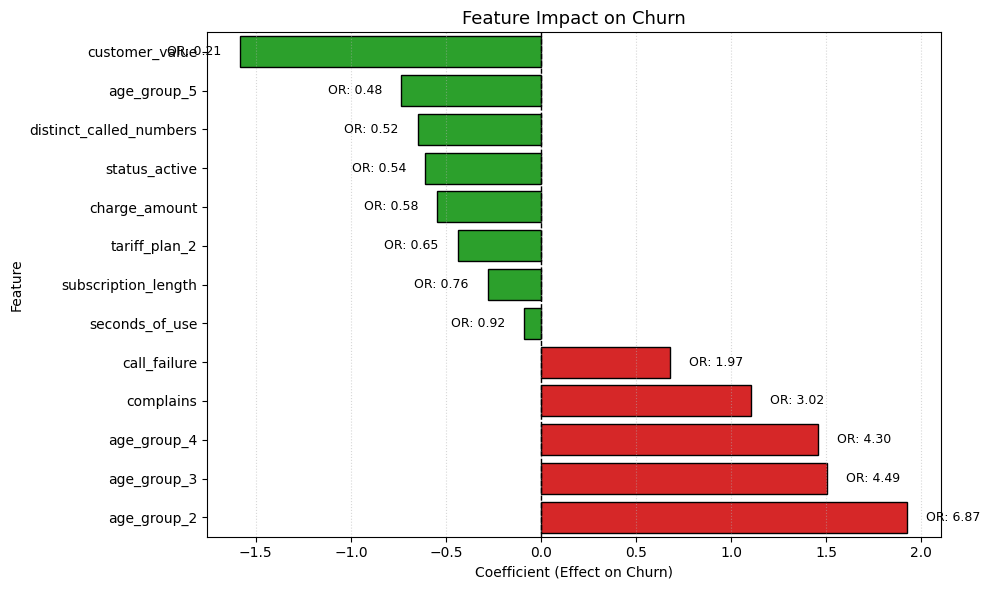

In [10]:
interpret_logistic_model(coef_df_final)

**Factors Increasing Churn Risk (Red Bars):**

- Age group 2 has the strongest effect with OR: 6.87, followed by age group 3 (OR: 4.49) and age group 4 (OR: 4.30)
- Customer complaints significantly increase churn risk (OR: 3.02)
- Call failures moderately increase churn likelihood (OR: 1.97)

**Factors Reducing Churn Risk (Green Bars):**

- Customer value is the strongest retention factor (OR: 0.21), meaning higher-value customers are less likely to churn
- Age group 5, distinct called numbers, and active status all have similar protective effects (OR: 0.48-0.54)
- Charge amount, tariff plan 2, and subscription length have moderate protective effects (OR: 0.58-0.76)
- Seconds of use has a minimal protective effect (OR: 0.92)